#Distribuciones en forma de anillo

In [66]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
  angle = rnd.uniform(0, 2 * pi, n_samples)
  distance = rnd.uniform(r_min, r_max, n_samples)
  data = []
  for a, d in zip(angle, distance):
    data.append([d * cos(a), d * sin(a)])
  return np.array(data)

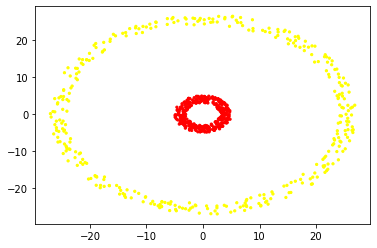

In [68]:
data1 = ring(3, 5)
data2 = ring(24, 27)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0, len(data1))], [1 for i in range(0, len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = 'autumn')

#Algoritmo con KMeans

In [69]:
from sklearn.cluster import KMeans

In [70]:
km = KMeans(2).fit(data)
clusters = km.predict(data)

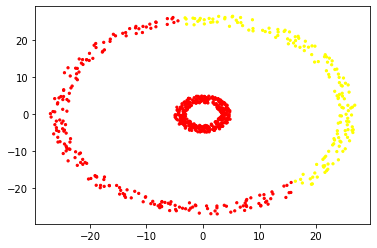

In [71]:
plt.scatter(data[:,0], data[:,1], c = clusters, s = 5, cmap = 'autumn') #Aquí se ve que la clusterización de KMeans solo la hace a partir de boundaries cerrados

#Algoritmo de los K Medoides

In [72]:
!pip install pyclust==0.2.0

In [73]:
from pyclust import KMedoids

In [74]:
kmed = KMedoids(2).fit_predict(data)

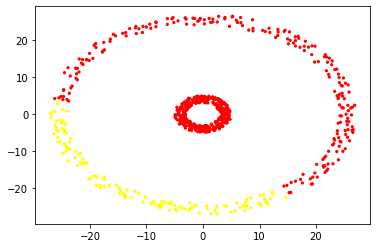

In [75]:
plt.scatter(data[:,0], data[:,1], c = kmed, s = 5, cmap = 'autumn')

#Algoritmo del Clustering Espectral

In [76]:
from sklearn.cluster import SpectralClustering

In [77]:
spectral_clusters = SpectralClustering(2).fit_predict(data)

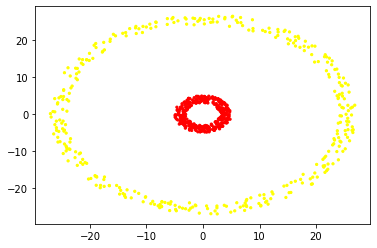

In [78]:
plt.scatter(data[:,0], data[:,1], c = spectral_clusters, s = 5, cmap = 'autumn')

* ¿Podemos estimar la k?

  * NO: Propagación de la afinidad

  * SÍ: ¿Podemos usar la distancia Euclídea?

    * SÍ: K-Means

    * NO: ¿Pueden buscarse valores centrales?

      * SÍ: K-Medoides

      * NO: ¿Los datos son linealmente separables?

        * SÍ: Clustering aglomerativo

        * NO: Clustering espectral
